In [2]:
# before everything, import libraries
from IPython.lib.display import YouTubeVideo

# III. Algorithms > 03. BFS and DFS


**[<< Previous lesson](./02_Sorting.ipynb)   |   [Next lesson >>]**

<hr>
&nbsp;

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Depth-for-Search" data-toc-modified-id="Depth-for-Search-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Depth for Search</a></span></li><li><span><a href="#Breadth-for-Search" data-toc-modified-id="Breadth-for-Search-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Breadth for Search</a></span></li><li><span><a href="#Application-to-trees" data-toc-modified-id="Application-to-trees-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Application to trees</a></span><ul class="toc-item"><li><span><a href="#Reminder-on-depth,-height-and-level-of-a-Tree" data-toc-modified-id="Reminder-on-depth,-height-and-level-of-a-Tree-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Reminder on depth, height and level of a Tree</a></span></li><li><span><a href="#Tree-implementation" data-toc-modified-id="Tree-implementation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Tree implementation</a></span></li><li><span><a href="#Preorder-vs.-postoder-vs.-inorder-traversals-(Depth-for-Search)" data-toc-modified-id="Preorder-vs.-postoder-vs.-inorder-traversals-(Depth-for-Search)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Preorder vs. postoder vs. inorder traversals (Depth for Search)</a></span><ul class="toc-item"><li><span><a href="#Recursive-implementation" data-toc-modified-id="Recursive-implementation-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Recursive implementation</a></span></li><li><span><a href="#Iterative-implementation" data-toc-modified-id="Iterative-implementation-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Iterative implementation</a></span></li></ul></li><li><span><a href="#Level-traversals-(Breadth-for-Search)" data-toc-modified-id="Level-traversals-(Breadth-for-Search)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Level traversals (Breadth for Search)</a></span></li><li><span><a href="#Finding-path-to-a-target" data-toc-modified-id="Finding-path-to-a-target-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Finding path to a target</a></span></li></ul></li></ul></div>

<hr>
&nbsp;

## Lessons

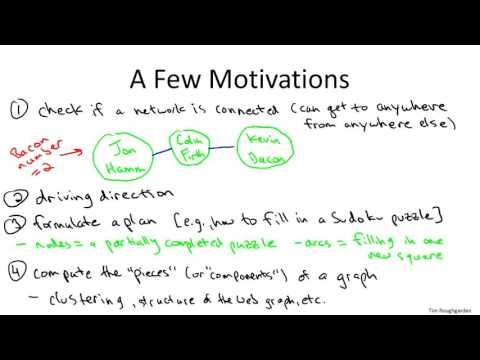

In [3]:
YouTubeVideo('SW6jwg7WS48',width=560,height=315)

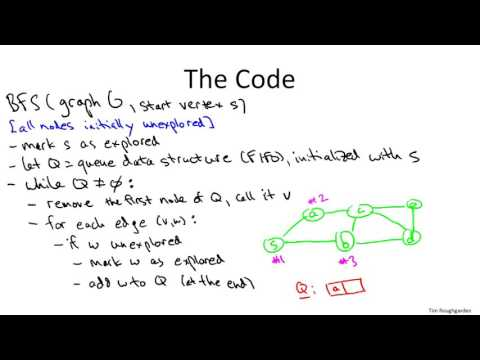

In [4]:
YouTubeVideo('73qCvXsYkfk',width=560,height=315)

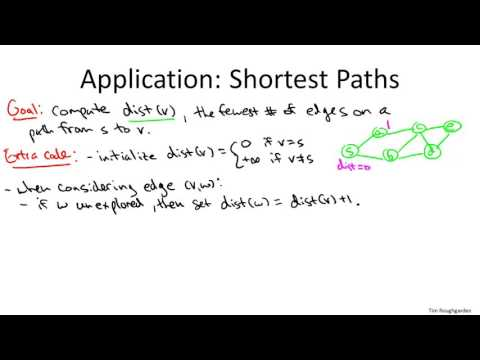

In [5]:
YouTubeVideo('AhEZ4yjkVxA',width=560,height=315)

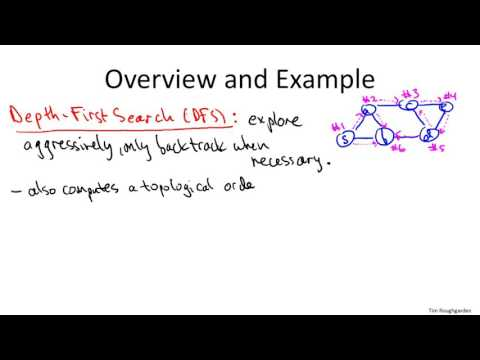

In [6]:
YouTubeVideo('_9_VUNrWGUs',width=560,height=315)

<hr>
&nbsp;

## Application to trees

### Reminder on depth, height and level of a Tree


Depth, height and level of a **node**:  

- The **depth** of a node is the number of edges from the root to the node.  
    - depth(root) = 0  
    - requires a top-down approach  
&nbsp;  

- The **level** of a node is the number of nodes from the root to the node.  
    - level(root) = 1  
    - level(node) = depth(node) + 1  
    - requires a top-down approach  
&nbsp;  

- The **height** of a node is defined by the number of edges on the *longest path* from the node to a leaf  
    - height(leaf) = 0  
    - height(node) = max(depth(node))  
    - requires a bottom-up approach  

&nbsp;  
Depth and height of a **tree**:
- The **height**of a tree is the height of its root node, i.e. the depth of its *deepest node*.
- The **diameter** (or **width**) of a tree is the number of *nodes* on the longest path between any two leaf nodes.

![tree depth vs height](./attachments/tree_img2.png)

This tree has a diameter of 6 nodes.

<hr>
&nbsp;

### Tree implementation

In [1]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

<hr>
&nbsp;

### Preorder vs. postoder vs. inorder traversals (Depth for Search)


![tree_image](./attachments/tree_img1.png)

**pre-order:**
- F, B, A, D, C, E, G, I, H


**in-order:**
- A, B, C, D, E, F, G, H, I


**post-order:**
- A, C, E, D, B, H, I, G, F

#### Recursive implementation

**Preorder Traversal**

In [2]:
def preorder_recur(root):
    """Preorder recursive."""
    if not root:
        return None

    def helper(node):
        if not node:
            return
        nonlocal traversal
        traversal.append(node.val)  # print
        helper(node.left)
        helper(node.right)

    traversal = []
    helper(root)
    return traversal

In [3]:
def preorder_recur(root):
    """One line alternative."""
    return [root.val] + preorder_recur(root.left) + preorder_recur(root.right) if root else []

**Postorder Traversal**

In [4]:
def postorder_recur(root):
    """Postorder recursive."""
    if not root:
        return None

    def helper(node):
        if not node:
            return
        nonlocal traversal
        helper(node.left)
        helper(node.right)
        traversal.append(node.val)  # print

    traversal = []
    helper(root)
    return traversal

In [5]:
def postorder_recur(root):
    """One line alternative."""
    return postorder_recur(root.left) + postorder_recur(root.right) + [root.val] if root else []

**Inorder Traversal**

In [6]:
def inorder_recur(root):
    """Inorder recursive.
    Note: reverse the 2 (*) lines for decreasing order traversal"""
    if not root:
        return None

    def helper(node):
        if not node:
            return
        nonlocal traversal
        helper(node.left)           # (*)
        traversal.append(node.val)  # print
        helper(node.right)          # (*)

    traversal = []
    helper(root)
    return traversal

In [7]:
def inorder_recur(root):
    """Inorder recursive."""
    return inorder_recur(root.left) + [root.val] + inorder_recur(root.right) if root else []

#### Iterative implementation

**Preorder Traversal**

In [8]:
from collections import deque

def preorder_iter(root):
    """Preorder iterative. requires 1 stack + 1 queue (for appendleft)"""
    if not root:
        return []
    stack = [root]
    traversal = deque()
    while stack:
        node = stack.pop()
        if not node:
            continue
        traversal.appendleft(node.val)  # print (left)
        stack += node.right, node.left  # pust Right child first to make sure
        #                               # that left subtree is processed 1st

    return traversal  # pop for normal order // popleft for reversed order

**Postorder Traversal**

In [9]:
from collections import deque

def postorder_iter(root):
    """Postorder iterative. using 1 stack + 1 queue (but could use 2 stacks)"""
    if not root:
        return []
    stack = [root]
    traversal = deque()  # could use 2nd stack instead of queue: traversal = []
    while stack:
        node = stack.pop()
        if not node:
            continue
        traversal.append(node.val)  # print (right)
        stack += node.left, node.right

    return traversal  # pop for normal order // popleft for reversed order

**Inorder Traversal**

In [10]:
def inorder_iter(root):
    """Inorder iterative. using 2 stacks"""
    stack = []
    traversal = []
    node = root
    while node or stack:
        while node:  # go to the leftmost child
            stack.append(node)
            node = node.left
        # if no more left child, get the 1st right node and check for leftmost child again
        node = stack.pop()
        traversal.append(node.val)  # print
        node = node.right

    return traversal

In [11]:
def inorder_iter(root):
    """Single loop alternative using 2 stacks"""
    stack = []
    traversal = []
    node = root
    while stack or node:
        if node:
            stack.append(node)
            node = node.left
        else:
            tmp_node = stack.pop()
            traversal.append(tmp_node.val)  # print
            node = tmp_node.right

    return traversal

In [12]:
from collections import deque

def inorder_iter(root):
    """Inorder iterative. using 1 stack + 1 queue"""
    stack = []
    traversal = deque()
    node = root
    while node or stack:
        # travel to each node's left child until leaf
        while node:
            stack.append(node)
            node = node.left
        node = stack.pop()
        traversal.appendleft(node.val)  # print
        node = node.right

    return reversed(traversal)

In [13]:
from collections import deque

def inorder_iter(root):
    """Single loop alternative 1 stack + 1 queue"""
    stack = []
    traversal = deque()
    node = root
    while stack or node:
        if node:
            stack.append(node)
            node = node.left
        else:
            tmp_node = stack.pop()
            traversal.appendleft(tmp_node.val)  # print
            node = tmp_node.right

    return reversed(traversal)

**Going further**  

[Morris Traversal](https://www.geeksforgeeks.org/morris-traversal-for-preorder/)

<hr>
&nbsp;

### Level traversals (Breadth for Search)

**Iterative implementation**

In [14]:
def BFS_iter(root):
    """Level traversal (BFS) using list"""
    queue = [root]
    traversal = []
    for node in queue:
        if not node:
            continue
        traversal.append(node.val)  # print
        queue += node.left, node.right
    return(traversal)

In [15]:
from collections import deque

def BFS_iter(root):
    """Level traversal (BFS) using deque."""
    queue = deque()
    queue.append(root)
    traversal = []
    while queue:
        node = queue.popleft()
        if not node:
            continue
        traversal.append(node.val)  # print
        queue += node.left, node.right
    return(traversal)

<hr>
&nbsp;

### Finding path to a target

**Recursive implementation (DFS)**

In [ ]:
def path_to_target(root, target):
    """recursive top-down solution using DFS (preorder traversal)"""
    def dfs(node, target, path):
        nonlocal result
        if not node:
            return

        tmp_path = path + [node.val]
        if node.val == target:
            result = tmp_path
        dfs(node.left, target, tmp_path)
        dfs(node.right, target, tmp_path)

    result = []
    dfs(root, target, [])
    return result if result else -1

In [ ]:
def path_to_target(root, target):
    """alternative version of top-down recursive solution"""
    def dfs(node, target):
        if not node:
            return []

        if node.val == target:
            return [node.val]

        path = dfs(node.left, target)
        if path:
            return [node.val] + path

        path = dfs(node.right, target)
        if path:
            return [node.val] + path

        return []

    result = dfs(root, target)
    return result if result else -1

In [ ]:
def path_to_target(root, target):
    """Yet another alternative version of top-down recursive solution"""
    def dfs(node, target, path):
        if not node:
            return False

        path.append(node.val)
        if node.val == target:
            return True

        target_found = dfs(node.left, target, path)
        if target_found:
            return True

        target_found = dfs(node.right, target, path)
        if target_found:
            return True

        path.pop()


    result = []
    target_found = dfs(root, target, result)
    return result if target_found else -1

In [ ]:
def path_to_target(root, target):
    """recursive bottom-up solution using DFS (preorder traversal)"""
    def dfs(node, target, path):
        if not node:
            return False

        left = dfs(node.left, target, path)
        right =  dfs(node.right, target, path)
        if node.val == target or left or right:
            path.append(node.val)                 # only happened once we found target
            return True

        return False


    result = []
    target_found = dfs(root, target, result)
    result.reverse()                            # this way of doing requires reversing path
    return result if target_found else -1

In [ ]:
from collections import deque

def path_to_target(root, target):
    """alternative version of recursive bottom-up solution using a hashmap of parents"""
    def dfs(node, target, parent):
        if not node:
            return
        if target in parent:
            return
        if node.left:
            parent[node.left] = node
            dfs(node.left, target, parent)
        if node.right:
            parent[node.right] = node
            dfs(node.right, target, parent)

    parent = {root:None}
    dfs(root, target, parent)
    result = deque()
    while target in parent:  # find all ancestors of target
        result.appendleft(target)
        target = parent[target]
    return list(result) if result else -1

**Iterative implementation (DFS)**

In [ ]:
def path_to_target(root, target):
    """iterative top-down solution using DFS (preorder traversal)"""
    if not root:
        return -1

    stack = [(root, [])]
    result = []

    while stack:
        node, path = stack.pop()
        if not node:
            continue

        tmp_path = path + [node.val]
        if node.val == target:
            result = tmp_path
            break
        stack += (node.right, tmp_path), (node.left, tmp_path),

    return result if result else -1

In [ ]:
from collection import deque

def path_to_target(root, target):
    """iterative bottom-up solution using DFS (preorder traversal)"""
        
    if not root:
        return -1

    stack = [root]
    prev = None
    parent = {root: None}
    result = deque()

    while stack:
        node = stack.pop()
        if node.val == target:
            prev = node
            break
        if node.left:
            parent[node.left] = node
            stack += node.left,
        if node.right:
            parent[node.right] = node
            stack += node.right,

    while prev:
        result.appendleft(prev.val)
        prev = parent[prev]

    return list(result) if result else -1

**Iterative implementation (BFS)**

In [ ]:
def path_to_target(root, target):
    """iterative solution using BFS (level traversal)"""
    if not root:
        return -1

    queue = [(root, [])]
    result = []
    
    for node, path in queue:
        if not node:
            continue

        tmp_path = path + [node.val]
        if node.val == target:
            result = tmp_path
            break
        queue += (node.right, tmp_path), (node.left, tmp_path),

    return result if result else -1

In [ ]:
from collection import deque

def path_to_target(root, target):
    """iterative bottom-up solution using BFS (level traversal)"""
        
    if not root:
        return -1

    queue = [root]
    prev = None
    parent = {root: None}
    result = deque()

    for node in queue:

        # Option 1
        if node.val == target:               #
            prev = node
            break
        if node.left:
            parent[node.left] = node
            queue += node.left,
        if node.right:
            parent[node.right] = node
            queue += node.right,

#         # Option 2
#         if not node:
#             continue
#         if node.val == target:
#             prev = node
#             break
#         parent[node.left] = node
#         parent[node.right] = node
#         queue += node.right, node.left,       
#
#     parent[None] = None     

    while prev:
        result.appendleft(prev.val)
        prev = parent[prev]

    return list(result) if result else -1